# 에지 추출

에지(Edge)란? : Image의 강도(Intensity)가 급격하게 변하는 부분 

In [18]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt


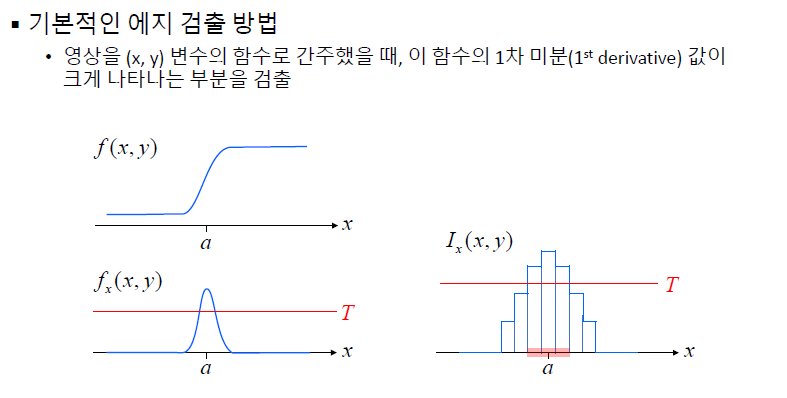

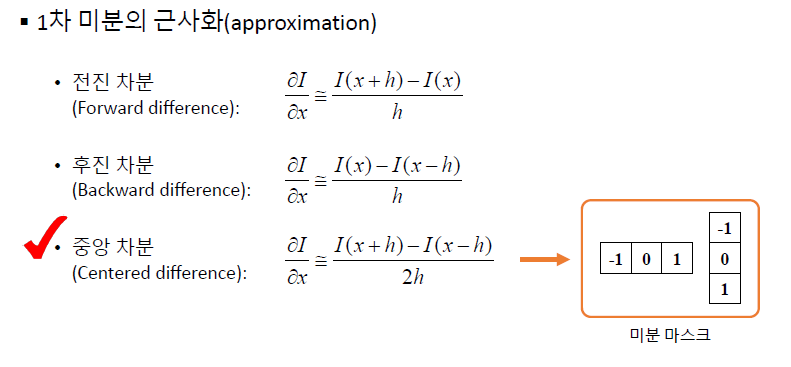

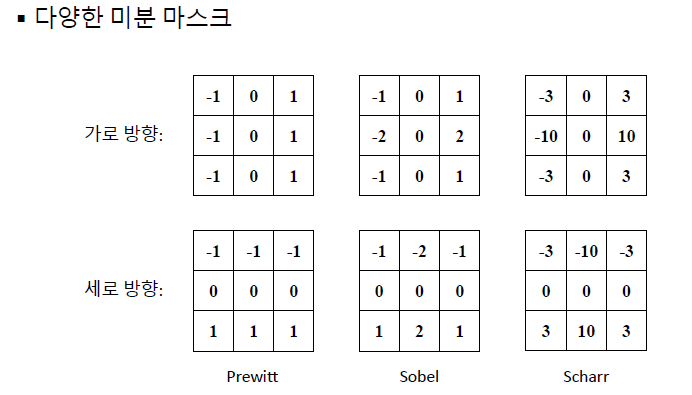

In [7]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)   ## x 방향 미분 적용
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)   ## y 방향 미분 적용

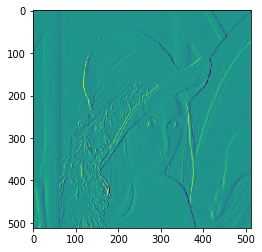

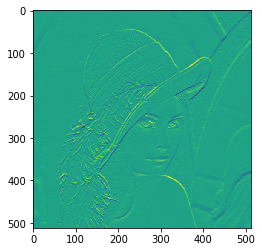

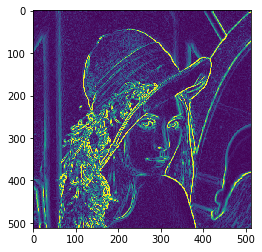

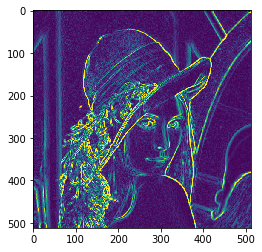

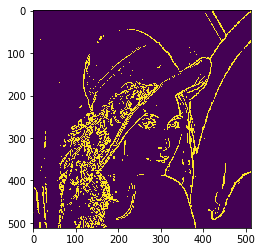

In [17]:
plt.imshow(dx)
plt.show()

plt.imshow(dy)
plt.show()

## Magitude 식 구현
k = (dx**2 + dy**2)**0.5
k = np.clip(k, 0, 255).astype(np.uint8)
plt.imshow(k)
plt.show()

## Magitude 함수
mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)
plt.imshow(mag)
plt.show()

## 증폭
dst = np.zeros(src.shape[:2], np.uint8)
dst[mag > 120] = 255

plt.imshow(dst)
plt.show()

# 캐니 에지(Canny Edge) 검출
 https://carstart.tistory.com/188
 
장점 : 
1. 낮은 에러율
2. 에지 위치의 정확성
3. 단일 에지 점 응답 (하나의 에지는 하나의 점으로 표현)

이 좋다. (윤곽을 잘찾아내면서도 현재도 잘 사용중)

단점 : 구현이 복잡하고 실행시간이 길다.


에지(Edge)란? : Image의 강도(Intensity)가 급격하게 변하는 부분

캐니 에지 실행 단계:
1. 가우시안 필터링 (스무딩)
2. 그래디언트 계산 (강도가 변하는 크기와 방향을 계산)
3. 비최대 억제 (Non-Maximum supression)



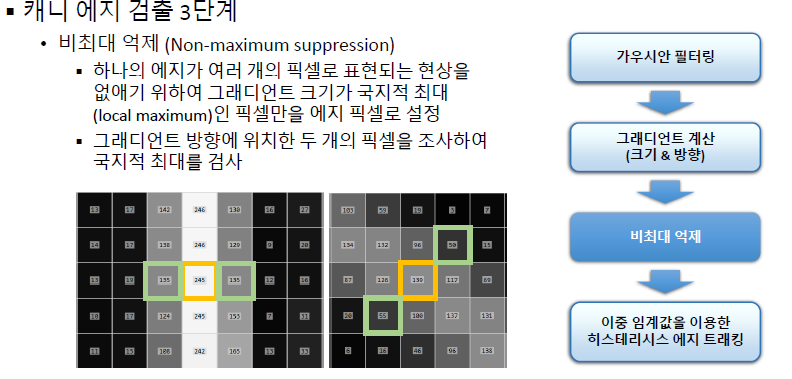






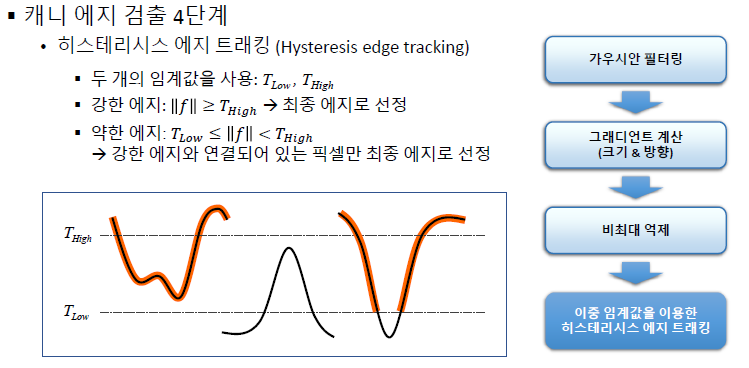


이중 임계값에서 높은 임계값보다 높으면 '강한 에지'

높은 임계값보다는 낮으나, 낮은 임계값보다 크면 '약한 에지'로 구분지음

'강한 에지'는 바로 에지로 판단하나, '약한 에지'는 '에지 트래킹'을 적용하여 판단함

'에지 트래킹'은 결국 '강한 에지와 연결된 약한 에지는 에지로 판단한다'(에지는 연속성이 있다는 논리)

위 그림에서 빨강색으로 덧대진 부분만 엣지가 된다.

https://carstart.tistory.com/188

https://wiserloner.tistory.com/857

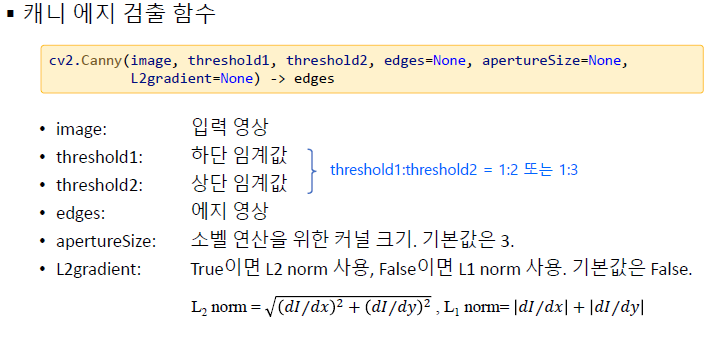

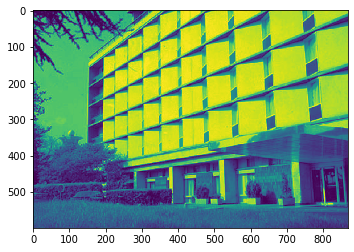

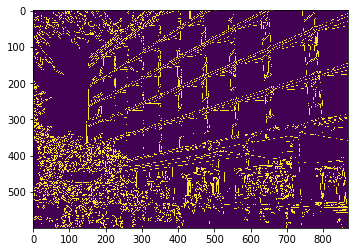

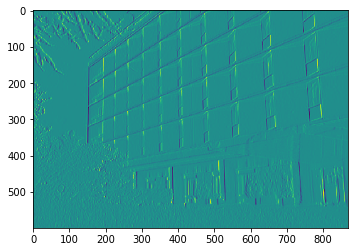

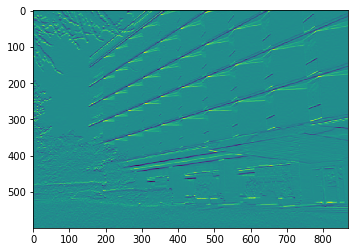

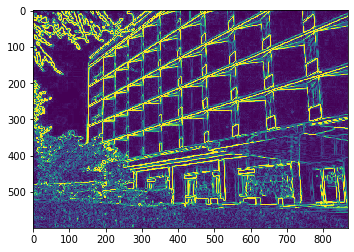

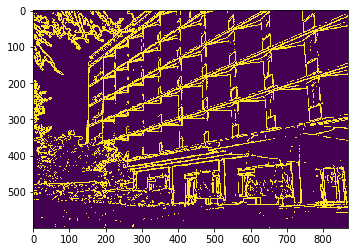

In [8]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.Canny(src, 50, 150)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0)   ## x 방향 미분 적용
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1)   ## y 방향 미분 적용

mag = cv2.magnitude(dx, dy)
mag = np.clip(mag, 0, 255).astype(np.uint8)
dst2 = np.zeros(src.shape[:2], np.uint8)
dst2[mag > 120] = 255

plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()
plt.imshow(dx)
plt.show()
plt.imshow(dy)
plt.show()
plt.imshow(mag)
plt.show()
plt.imshow(dst2)
plt.show()


### mag도 캐니 에지에 비해 나쁘지 않은 듯 ???


허프 변환 (직선 검출)
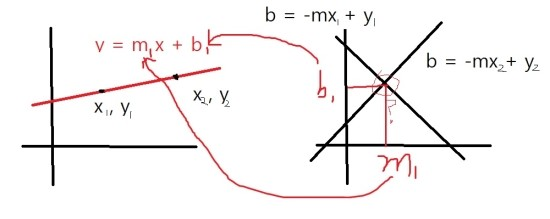

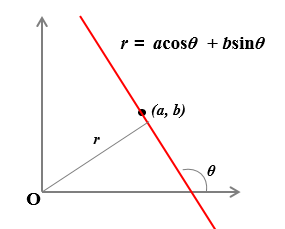

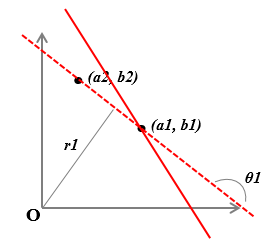

한 점(a1, b1)를 지나는 직선은 무수히 많다. 
한 점(a1, b1)을 지나는 직선 중에 (a2, b2)도 지나는 직선의 (거리, 기울기)를 (r1, theta1)이라고 하자.

이때 점 (a2, b2) 또한 자신을 지나는 무수히 많은 직선 중에 (r1, theta1)인 직선이 존재할 것이며
이 직선은 (a1, b1)고 (a2, b2)를 지나는 직선이 된다.

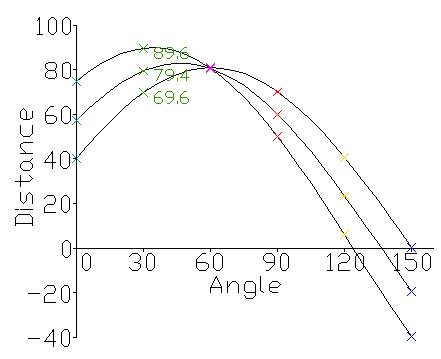

이렇게 거리와 기울기에 대한 좌표에서 교점이 생긴다는 것은(교점이 많다는 것은) 
이미지에서 그 거리와 기울기를 갖는 직선이 존재할 확률이 높다는 뜻이다.

이러한 논리로 허프 변환을 수행한다.

(극 좌표계를 사용하는 이유: y축과 평행한 수직선을 표현하지 못함, 기울기 무한대가 됨)

https://opencv-python.readthedocs.io/en/latest/doc/25.imageHoughLineTransform/imageHoughLineTransform.html
https://m.blog.naver.com/samsjang/220588392347

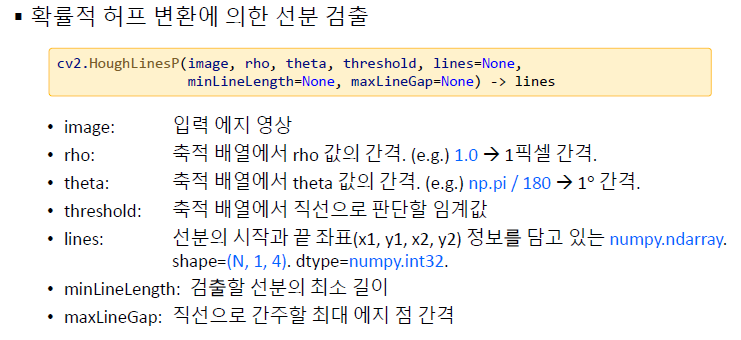

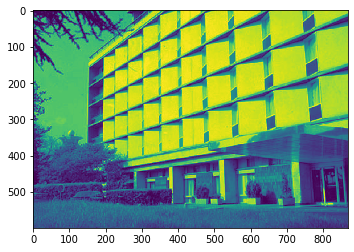

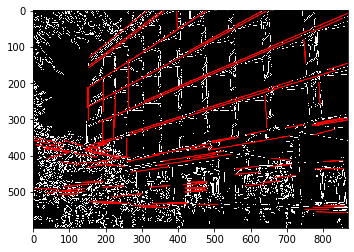

In [19]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

edges = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi / 180., 160,
                        minLineLength=50, maxLineGap=5)

dst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])  # 시작점 좌표
        pt2 = (lines[i][0][2], lines[i][0][3])  # 끝점 좌표
        cv2.line(dst, pt1, pt2, (255, 0, 0), 2, cv2.LINE_AA)
         

plt.imshow(src)
plt.show()
plt.imshow(dst)
plt.show()

#  허프 원 검출

https://www.charlezz.com/?p=45235

https://theailearner.com/tag/hough-gradient-method/

1 . Hough Transform - circle

2 . Hough Gradient Method (메모리 덜 필요(N^2 + N), 계산 속도 빠름, OPEN-CV에서 활용) 

1 . Hough Transform - circle

1) 반지름을 알때, 원을 찾기 (a, b만 즉, 원의 중심 좌표만 변수)

x = a + r * cos(θ)

y = b + r * sin(θ)   -> (x-a)2 + (y-b)2 = r2 의 변형 

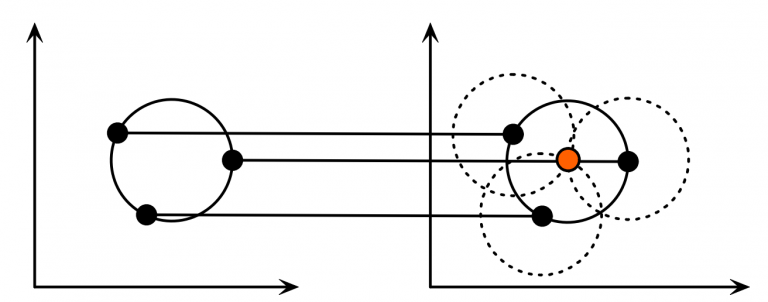






2) 반지름을 모를때, 원을 찾기 (a, b, r 모두 변수)

모든 픽셀 x, y에 대해 아래 그림처럼 원뿔을 생성하여(a,b,r 변수이므로 3차원)

일정 임계값 이상으로 겹치는 교점을 원의 중심과 반지름이라 판단한다. (다만 계산량 많음) 

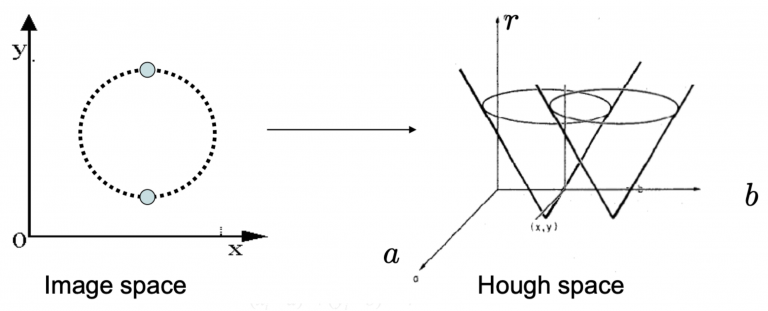

2 .  Hough Gradient Method

아래와 같이 각 픽셀의 기울기(그래디언트)를 구하여, 수선을 그리면 교점이 생성된다.

일정 이상만큼 겹치는 교점을 원의 중심이라 판단한다.

원의 중심점을 찾은 이후에는, 원의 중심점을 찾을때 사용한, (x,y)를 활용하여 반지름을 구할수 있다.
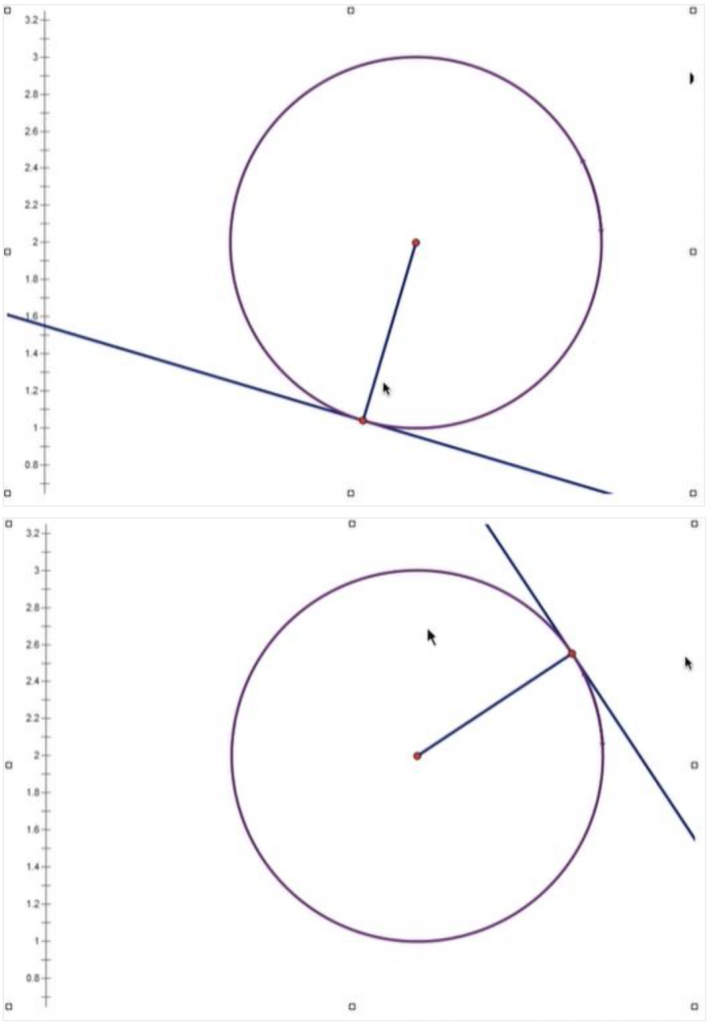

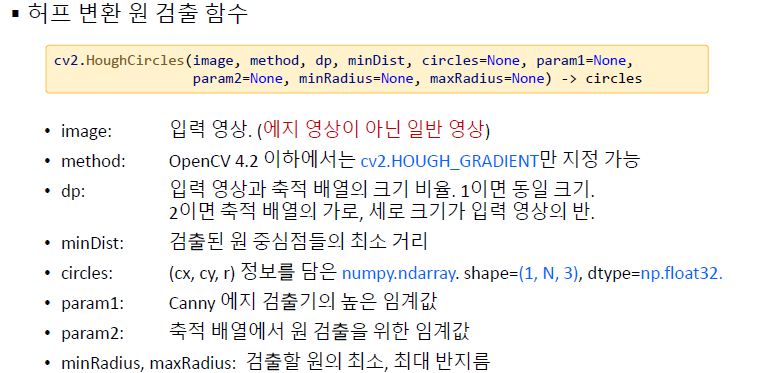

In [42]:
import sys
import numpy as np
import cv2




def on_trackbar(pos):
    rmin = cv2.getTrackbarPos('minRadius', 'img')
    rmax = cv2.getTrackbarPos('maxRadius', 'img')
    th = cv2.getTrackbarPos('threshold', 'img')
    print(th)
    circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50, param1=120, param2=th, minRadius=rmin, maxRadius=rmax)

    dst = src.copy()
    if circles is not None:
        for i in range(circles.shape[1]):
            cx, cy, radius = circles[0][i].astype(int)
            cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('img', dst)



# 입력 이미지 불러오기
src = cv2.imread('dial.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1)





# 트랙바 생성
cv2.imshow('img', src)
cv2.createTrackbar('minRadius', 'img', 0, 100, on_trackbar)
cv2.createTrackbar('maxRadius', 'img', 0, 150, on_trackbar)
cv2.createTrackbar('threshold', 'img', 1, 100, on_trackbar)  ## 0부터 시작하면 param2 =th에 th값이 0으로 입력되어 에러 발생
cv2.setTrackbarPos('minRadius', 'img', 10)
cv2.setTrackbarPos('maxRadius', 'img', 80)
cv2.setTrackbarPos('threshold', 'img', 40)
cv2.waitKey()

cv2.destroyAllWindows()


1
1
1
40
39
38
37
36
35
34
35
36
37
38
39
40
41
42
43


In [32]:
import sys
import numpy as np
import cv2


# 입력 이미지 불러오기
src = cv2.imread('coins1.jpg')

if src is None:
    print('Image open failed!')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(gray, (0, 0), 1)

# 허프 변환 원 검출
circles = cv2.HoughCircles(blr, cv2.HOUGH_GRADIENT, 1, 50,
                           param1=150, param2=40, minRadius=20, maxRadius=80)

# 원 검출 결과 및 동전 금액 출력
sum_of_money = 0
dst = src.copy()
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius = circles[0][i]

        cv2.circle(dst, (int(cx), int(cy)), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

        # 동전 영역 부분 영상 추출
        x1 = int(cx - radius)
        y1 = int(cy - radius)
        x2 = int(cx + radius)
        y2 = int(cy + radius)
        radius = int(radius)
        
        crop = dst[y1:y2, x1:x2, :]
        ch, cw = crop.shape[:2]

        # 동전 영역에 대한 ROI 마스크 영상 생성
        mask = np.zeros((ch, cw), np.uint8)
        cv2.circle(mask, (cw//2, ch//2), radius, 255, -1)

        # 동전 영역 Hue 색 성분을 +40 시프트하고, Hue 평균을 계산
        hsv = cv2.cvtColor(crop, cv2.COLOR_BGR2HSV)
        hue, _, _ = cv2.split(hsv)
        hue_shift = (hue + 40) % 180
        mean_of_hue = cv2.mean(hue_shift, mask)[0]

        # Hue 평균이 90보다 작으면 10원, 90보다 크면 100원으로 간주
        won = 100
        if mean_of_hue < 90:
            won = 10

        sum_of_money += won

        cv2.putText(crop, str(won), (20, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    0.75, (255, 0, 0), 2, cv2.LINE_AA)

cv2.putText(dst, str(sum_of_money) + ' won', (40, 80),
            cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2, cv2.LINE_AA)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()

cv2.destroyAllWindows()


305.5 339.5
390.5 485.5
310.5 206.5
109.5 411.5
520.5 125.5
613.5 301.5
142.5 150.5
544.5 424.5
702.5 191.5
196.5 276.5
454.5 280.5
